## Import needed libraries and pakages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

from keras.models import Sequential
from keras.layers import Dense 

## Read data and explore it

In [2]:
data = pd.read_csv("data/mpg.csv")
print(f"Shape of the data: {data.shape}\n")
print(data.info())
data.head()

Shape of the data: (398, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### Notes: 
- there is no missing values 
- the `horsepower` column's data type is `object` and it should be numerical and the `origin` should be categorical value
- we have one categorical value which is the `car name`, we will check its unique values and see if we could apply encoding

## Data Preprocessing

### Convert data type of the `horsepower` column to numerical value and `origin` to categorical

In [3]:
data["horsepower"] = pd.to_numeric(data["horsepower"], errors="coerce")
data["origin"] = data["origin"].astype("object")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


#### Note: we have missing values in `horsepower` column now, we have to deal with

In [4]:
data[pd.isnull(data).any(axis=1) == True]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [5]:
data["horsepower"].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

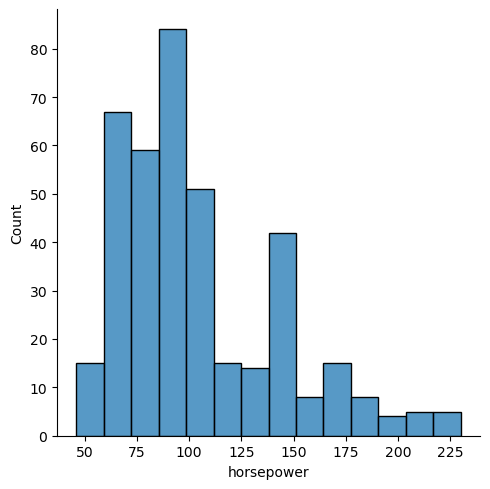

In [6]:
sns.displot(data, x="horsepower")

In [7]:
data["horsepower"].describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [8]:
# filling the null values with the median value 
data["horsepower"].fillna(data["horsepower"].median(), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


### Dealing with the categorical values

In [10]:
cat_cols = [col for col in data.columns if data[col].dtype=="object"]
print("Unique values of the categorical variables: ")

for col in cat_cols:
    print(col, data[col].nunique())

Unique values of the categorical variables: 
origin 3
name 305


#### encoding the `object` column using one hot encoding and dropping the `car name` column 

In [11]:
transformer = make_column_transformer((OneHotEncoder(), ["origin"]), remainder="passthrough")

transformed = transformer.fit_transform(data[["origin"]])
transformed_df = pd.DataFrame(transformed, index=data.index)
transformed_df.head()

,0,1,2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [12]:
data.drop(columns=["name", "origin"], axis=1, inplace=True)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


### Normalization

In [13]:
scaled_cols = ["cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year"]
scaler_transformer = make_column_transformer((StandardScaler(), scaled_cols), remainder="passthrough")

scaled = scaler_transformer.fit_transform(data[scaled_cols])
scaled_df = pd.DataFrame(scaled, index=data.index, columns=scaled_cols)
scaled_df.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


In [14]:
X = pd.concat([scaled_df, transformed_df], axis=1)
y = data.iloc[:, 0]

In [15]:
X.columns = X.columns.astype(str)
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,0,1,2
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,1.0,0.0,0.0
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,1.0,0.0,0.0
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,1.0,0.0,0.0
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,1.0,0.0,0.0
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,1.0,0.0,0.0


In [16]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

### NN model - single layer

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = Sequential()
model.add(Dense(1, input_dim=9, activation="linear"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss="mse", optimizer="sgd", metrics="mae")

In [19]:
result = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
10/10 [==============================] - 2s 66ms/step - loss: 453.2460 - mae: 20.3435 - val_loss: 332.0717 - val_mae: 17.3979
Epoch 2/100
10/10 [==============================] - 0s 12ms/step - loss: 254.2135 - mae: 15.1755 - val_loss: 198.3885 - val_mae: 13.1808
Epoch 3/100
10/10 [==============================] - 0s 13ms/step - loss: 149.7546 - mae: 11.3958 - val_loss: 123.8954 - val_mae: 10.0087
Epoch 4/100
10/10 [==============================] - 0s 12ms/step - loss: 92.7899 - mae: 8.5745 - val_loss: 81.4048 - val_mae: 7.7220
Epoch 5/100
10/10 [==============================] - 0s 13ms/step - loss: 60.7785 - mae: 6.5595 - val_loss: 57.3435 - val_mae: 6.1971
Epoch 6/100
10/10 [==============================] - 0s 13ms/step - loss: 42.9833 - mae: 5.2883 - val_loss: 43.0985 - val_mae: 5.1986
Epoch 7/100
10/10 [==============================] - 0s 12ms/step - loss: 32.7717 - mae: 4.5574 - val_loss: 34.3592 - val_mae: 4.5596
Epoch 8/100
10/10 [==============================]

10/10 [==============================] - 0s 12ms/step - loss: 11.6149 - mae: 2.5520 - val_loss: 11.7915 - val_mae: 2.7211
Epoch 62/100
10/10 [==============================] - 0s 12ms/step - loss: 11.6165 - mae: 2.5472 - val_loss: 11.7928 - val_mae: 2.7250
Epoch 63/100
10/10 [==============================] - 0s 12ms/step - loss: 11.5861 - mae: 2.5433 - val_loss: 11.7405 - val_mae: 2.7154
Epoch 64/100
10/10 [==============================] - 0s 12ms/step - loss: 11.5516 - mae: 2.5356 - val_loss: 11.7669 - val_mae: 2.7257
Epoch 65/100
10/10 [==============================] - 0s 12ms/step - loss: 11.5302 - mae: 2.5359 - val_loss: 11.7540 - val_mae: 2.7246
Epoch 66/100
10/10 [==============================] - 0s 12ms/step - loss: 11.5261 - mae: 2.5349 - val_loss: 11.7121 - val_mae: 2.7178
Epoch 67/100
10/10 [==============================] - 0s 12ms/step - loss: 11.5140 - mae: 2.5265 - val_loss: 11.7613 - val_mae: 2.7350
Epoch 68/100
10/10 [==============================] - 0s 12ms/step -

In [20]:
pred = model.predict(X_test)
score = r2_score(pred, y_test)
print(f"Score of the single layer model: {score * 100 :.2f}")

3/3 [==============================] - 0s 4ms/step
Score of the single layer model: 77.96


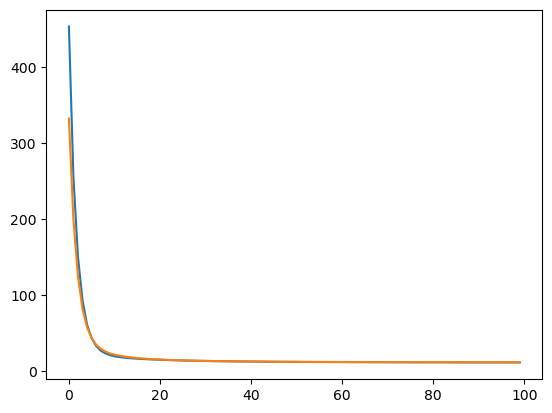

In [21]:
plt.plot(result.history["loss"])
plt.plot(result.history["val_loss"])

### NN model - Multi layer perceptron model 

In [26]:
mlp = Sequential()
mlp.add(Dense(16, input_dim=9, activation="relu"))
mlp.add(Dense(8, activation="relu"))
mlp.add(Dense(4, activation="relu"))
mlp.add(Dense(1))
mlp.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                160       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 4)                 36        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [27]:
mlp.compile(loss="mse", optimizer="adam", metrics="mae")
result_mlp = mlp.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), verbose=1)

Epoch 1/200
10/10 [==============================] - 2s 62ms/step - loss: 591.0644 - mae: 22.9733 - val_loss: 571.9316 - val_mae: 22.4418
Epoch 2/200
10/10 [==============================] - 0s 14ms/step - loss: 577.8822 - mae: 22.6773 - val_loss: 558.4274 - val_mae: 22.1177
Epoch 3/200
10/10 [==============================] - 0s 16ms/step - loss: 563.4782 - mae: 22.3452 - val_loss: 543.0836 - val_mae: 21.7503
Epoch 4/200
10/10 [==============================] - 0s 12ms/step - loss: 546.9094 - mae: 21.9637 - val_loss: 525.3038 - val_mae: 21.3247
Epoch 5/200
10/10 [==============================] - 0s 15ms/step - loss: 527.2903 - mae: 21.5139 - val_loss: 504.4539 - val_mae: 20.8207
Epoch 6/200
10/10 [==============================] - 0s 14ms/step - loss: 504.1667 - mae: 20.9706 - val_loss: 479.2599 - val_mae: 20.2064
Epoch 7/200
10/10 [==============================] - 0s 20ms/step - loss: 476.2344 - mae: 20.3073 - val_loss: 449.3790 - val_mae: 19.4528
Epoch 8/200
10/10 [===============

10/10 [==============================] - 0s 16ms/step - loss: 9.9036 - mae: 2.3476 - val_loss: 11.2357 - val_mae: 2.6109
Epoch 62/200
10/10 [==============================] - 0s 17ms/step - loss: 9.7397 - mae: 2.3253 - val_loss: 11.0962 - val_mae: 2.5878
Epoch 63/200
10/10 [==============================] - 0s 20ms/step - loss: 9.6069 - mae: 2.3036 - val_loss: 10.9520 - val_mae: 2.5669
Epoch 64/200
10/10 [==============================] - 0s 15ms/step - loss: 9.4824 - mae: 2.2842 - val_loss: 10.8037 - val_mae: 2.5395
Epoch 65/200
10/10 [==============================] - 0s 13ms/step - loss: 9.3470 - mae: 2.2656 - val_loss: 10.7121 - val_mae: 2.5283
Epoch 66/200
10/10 [==============================] - 0s 17ms/step - loss: 9.2446 - mae: 2.2496 - val_loss: 10.6009 - val_mae: 2.5117
Epoch 67/200
10/10 [==============================] - 0s 18ms/step - loss: 9.1218 - mae: 2.2285 - val_loss: 10.5296 - val_mae: 2.4995
Epoch 68/200
10/10 [==============================] - 0s 14ms/step - loss: 

10/10 [==============================] - 0s 21ms/step - loss: 7.1007 - mae: 1.9312 - val_loss: 8.5249 - val_mae: 2.1670
Epoch 123/200
10/10 [==============================] - 0s 29ms/step - loss: 7.1139 - mae: 1.9237 - val_loss: 8.7191 - val_mae: 2.1942
Epoch 124/200
10/10 [==============================] - 0s 23ms/step - loss: 7.0800 - mae: 1.9206 - val_loss: 8.5273 - val_mae: 2.1643
Epoch 125/200
10/10 [==============================] - 0s 17ms/step - loss: 7.0480 - mae: 1.9186 - val_loss: 8.5137 - val_mae: 2.1630
Epoch 126/200
10/10 [==============================] - 0s 18ms/step - loss: 7.0374 - mae: 1.9168 - val_loss: 8.5334 - val_mae: 2.1665
Epoch 127/200
10/10 [==============================] - 0s 17ms/step - loss: 7.0497 - mae: 1.9165 - val_loss: 8.5608 - val_mae: 2.1724
Epoch 128/200
10/10 [==============================] - 0s 16ms/step - loss: 7.0180 - mae: 1.9123 - val_loss: 8.4759 - val_mae: 2.1591
Epoch 129/200
10/10 [==============================] - 0s 18ms/step - loss: 

10/10 [==============================] - 0s 15ms/step - loss: 6.4695 - mae: 1.8455 - val_loss: 8.0334 - val_mae: 2.1086
Epoch 184/200
10/10 [==============================] - 0s 16ms/step - loss: 6.4344 - mae: 1.8412 - val_loss: 7.8981 - val_mae: 2.0970
Epoch 185/200
10/10 [==============================] - 0s 15ms/step - loss: 6.4166 - mae: 1.8357 - val_loss: 7.9276 - val_mae: 2.0975
Epoch 186/200
10/10 [==============================] - 0s 18ms/step - loss: 6.4088 - mae: 1.8359 - val_loss: 7.8681 - val_mae: 2.0922
Epoch 187/200
10/10 [==============================] - 0s 17ms/step - loss: 6.4138 - mae: 1.8366 - val_loss: 7.8492 - val_mae: 2.0888
Epoch 188/200
10/10 [==============================] - 0s 18ms/step - loss: 6.3954 - mae: 1.8351 - val_loss: 7.8926 - val_mae: 2.0928
Epoch 189/200
10/10 [==============================] - 0s 15ms/step - loss: 6.3817 - mae: 1.8251 - val_loss: 7.9916 - val_mae: 2.1065
Epoch 190/200
10/10 [==============================] - 0s 16ms/step - loss: 

In [28]:
pred_mlp = mlp.predict(X_test)
score_mlp = r2_score(pred_mlp, y_test)
print(f"Score of the double layer model: {score_mlp * 100 :.2f}")

3/3 [==============================] - 0s 6ms/step
Score of the double layer model: 84.53


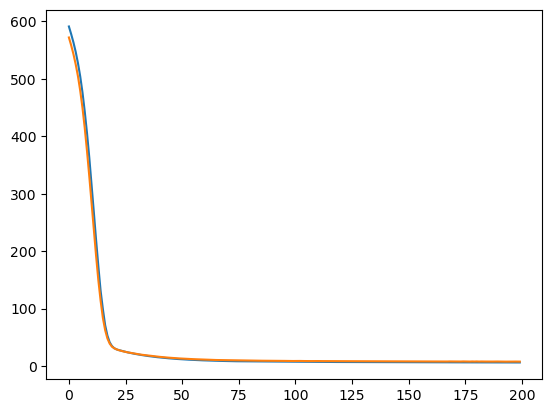

In [29]:
plt.plot(result_mlp.history["loss"])
plt.plot(result_mlp.history["val_loss"])